In [86]:
from utils.file_handling import *
from utils.misc import *
from utils.matplot_handlers import *
from utils.visualizers import *
from segmentation.composite_action_extractor import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Entropy Parameters
csv_file_name = 'Cartpole'
# csv_file_name = 'Mountaincar'
# csv_file_name = 'Pendulum'
# csv_file_name = 'Acrobot'
episodes = -1
analysis_method = 'w'

# Read in entropy csv
base_path = get_absolute_path('data', directory_file_hint=csv_file_name.lower(), ignore_files=False)
csv_path = os.path.join(base_path, 'state_action_data.csv')

pre_data = pd.read_csv(csv_path, index_col=None)
selected_episodes = pre_data['episode'].unique()  # Either do [some index] or [:]
selected_episodes = [selected_episodes] if np.isscalar(selected_episodes) else selected_episodes
data_df = pre_data[pre_data['episode'].isin(selected_episodes)]
data_df_episodes = [data_df[data_df['episode'] == episode].copy() for episode in selected_episodes]

In [87]:
selected_episodes

array([ 24, 115, 126, 127, 128, 130, 450])

In [88]:
main_df = data_df_episodes[episodes]

In [89]:
main_df

,index,step,action_values_0,state_values,episode
537,0,0,1.0,"[0.03476778930286919, 0.18189891581563805, 0.0...",450
538,1,1,1.0,"[0.03840576761918195, 0.37638733020315523, 0.0...",450
539,2,2,1.0,"[0.045933514223245056, 0.5709655505802029, 0.0...",450
540,3,3,0.0,"[0.057352825234849115, 0.3754922902741712, 0.0...",450
541,4,4,0.0,"[0.06486267104033254, 0.18023207252268783, -0....",450
542,5,5,1.0,"[0.0684673124907863, 0.37536202848856043, -0.0...",450
543,6,6,0.0,"[0.07597455306055752, 0.18031266941121024, -0....",450
544,7,7,1.0,"[0.07958080644878172, 0.3756534399300343, -0.0...",450
545,8,8,0.0,"[0.08709387524738241, 0.1808209007244405, -0.0...",450
546,9,9,1.0,"[0.09071029326187122, 0.37636790437580425, -0....",450


In [90]:
with open(os.path.join(base_path, 'video.pkl'), 'rb') as f:
    video_path = pickle.load(f)
video = video_path[selected_episodes[episodes]][0]

In [91]:
composite_actions, info = compositeActionExtractor.get_composite_actions(dataframe=main_df, analysis_method=analysis_method, 
                                                            window_size=15)

Text(0.5, 1.0, 'Action Values for Cartpole')

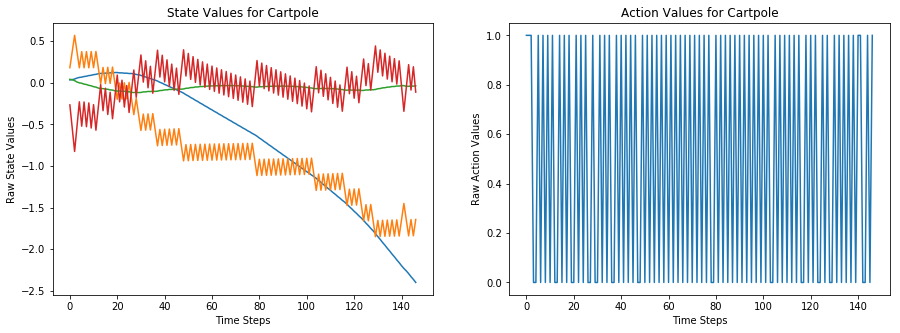

In [92]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state'])
plt.ylabel('Raw State Values')
plt.xlabel('Time Steps')
plt.title(f'State Values for {csv_file_name}')
plt.subplot(122)
plt.plot(info['actions'])
plt.ylabel('Raw Action Values')
plt.xlabel('Time Steps')
plt.title(f'Action Values for {csv_file_name}')

Text(0.5, 1.0, 'Action Measurements for Cartpole using w')

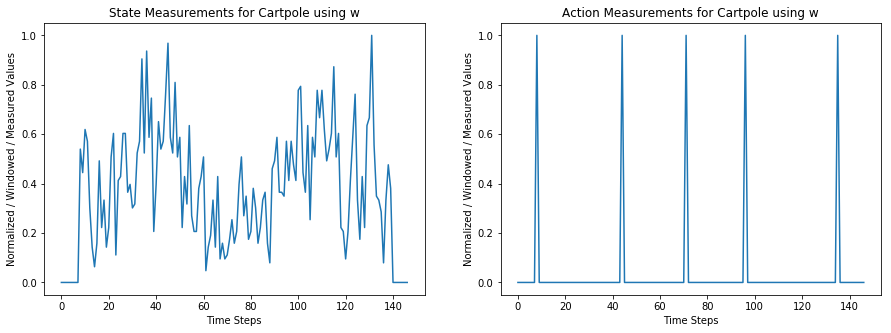

In [93]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state_analyzed_norm'])
plt.ylabel('Normalized / Windowed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'State Measurements for {csv_file_name} using {analysis_method}')
plt.subplot(122)
plt.plot(info['action_analyzed_norm'])
plt.ylabel('Normalized / Windowed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'Action Measurements for {csv_file_name} using {analysis_method}')

Text(0.5, 1.0, 'Action Threshed Measurements for Cartpole using w')

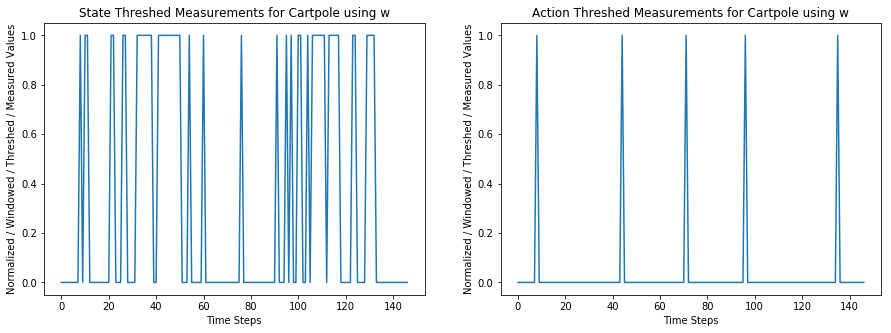

In [94]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state_analyzed_binary'])
plt.ylabel('Normalized / Windowed / Threshed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'State Threshed Measurements for {csv_file_name} using {analysis_method}')
plt.subplot(122)
plt.plot(info['action_analyzed_binary'])
plt.ylabel('Normalized / Windowed / Threshed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'Action Threshed Measurements for {csv_file_name} using {analysis_method}')

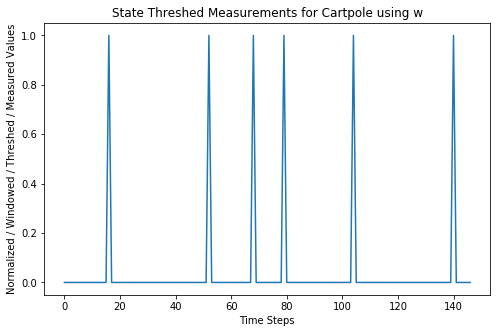

In [95]:
matplotlib.rcParams['figure.figsize'] = [8, 5]
for key in info['index_groups']:
    plt.subplot(1,len(info['index_groups']),1)
    plt.plot(info['index_groups'][key])
    plt.ylabel('Normalized / Windowed / Threshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'State Threshed Measurements for {csv_file_name} using {analysis_method}')

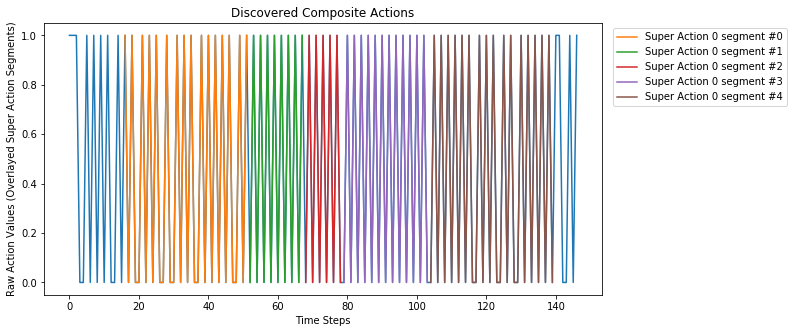

In [96]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.plot(info['actions'])
for action in composite_actions:
    for i, segment in enumerate(composite_actions[action]):
        plt.plot(segment, label=f'composite Action {action} segment #{i}')

plt.title('Discovered Composite Actions')
plt.ylabel('Raw Action Values (Overlayed composite Action Segments)')
plt.xlabel('Time Steps')
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")

In [97]:
from ipywidgets import FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

def f(i):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(video[i])

interact(f,i=IntSlider(min=0, max=video.shape[0]-1, step=1));

interactive(children=(IntSlider(value=0, description='i', max=146), Output()), _dom_classes=('widget-interact'…

In [98]:
composite_actions = {key: [seg[~np.isnan(seg)] for seg in composite_actions[key]] for key in composite_actions}

In [99]:
import pickle

name = os.path.join(base_path, 'segments')
if name[-4:] != ".pkl":
    name += ".pkl"
with open(name, 'wb') as f:
    pickle.dump(composite_actions, f, pickle.HIGHEST_PROTOCOL)